In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
from py_pcha import PCHA
from pathlib import Path


In [11]:
try:
    base = Path(__file__).resolve().parent.parent
except NameError:
    base = Path.cwd().parent.parent  # if running interactively inside si_figures/

df_maxs = pd.read_csv(base / 'data' / 'df_maxs.csv',index_col='Unnamed: 0')
df_parents = pd.read_csv(base / 'data' / 'df_max_parents_other_infections.csv',index_col='Unnamed: 0')
colors_dict = {'A/J':'#fbd921', 'C57BL/6J':'#a1a29e','C57BL/6':'#a1a29e', '129S1/SvImJ':'#efaeb6',
               'NOD/ShiLtJ':'#305c9b','NZO/HILtJ':'#89d0e8','PWK/PhJ':'#dd433d',
                'CAST/EiJ':'#4eaf47','WSB/EiJ':'#884187','DO':'#cfcec8'}

df_parents['color'] = [colors_dict[s] for s in df_parents['Strain']]
df_parents

,Number,Strain,Max.Parasitemia,Max.Weight.Delta,Max.RBC.Delta,Max.Temp.Delta,Immune.Intensity,Max.Parasitemia.zscore,Max.Weight.Delta.zscore,Max.RBC.Delta.zscore,...,IAV_weight,IAV_clinical,IAV_airway_infiltration,cov_titre,cov_weight,cov_survival,TB_ave_weight,TB_ave_log_spleen_cfu,TB_ave_log_lung_cfu,color
0,53,A/J,0.3713,4.3,13098.0,8.9,4315.7076,0.714944,1.957947,0.140215,...,85.70,1.14,1.17,1.075000e+05,95.64,1.0,-29.800000,5.883000,7.533500,#fbd921
0,54,A/J,0.3628,3.8,14123.0,12.3,4614.1360,0.640494,1.584974,0.499737,...,85.70,1.14,1.17,1.075000e+05,95.64,1.0,-29.800000,5.883000,7.533500,#fbd921
0,55,A/J,0.3413,5.8,12395.0,10.9,5476.9058,0.452180,3.076866,-0.106365,...,85.70,1.14,1.17,1.075000e+05,95.64,1.0,-29.800000,5.883000,7.533500,#fbd921
0,56,A/J,0.3199,3.9,12327.0,8.9,8460.2790,0.264742,1.659568,-0.130216,...,85.70,1.14,1.17,1.075000e+05,95.64,1.0,-29.800000,5.883000,7.533500,#fbd921
0,57,A/J,0.3996,4.2,16462.0,12.2,3638.3020,0.962817,1.883352,1.320150,...,85.70,1.14,1.17,1.075000e+05,95.64,1.0,-29.800000,5.883000,7.533500,#fbd921
0,58,C57BL/6J,0.3476,4.7,14968.0,14.9,3009.5390,0.507360,2.256325,0.796124,...,83.91,0.50,1.00,6.350000e+06,90.35,1.0,5.150000,6.462600,5.752000,#a1a29e
0,59,C57BL/6J,0.2820,1.5,11939.0,4.7,3782.7724,-0.067216,-0.130702,-0.266309,...,83.91,0.50,1.00,6.350000e+06,90.35,1.0,5.150000,6.462600,5.752000,#a1a29e
0,60,C57BL/6J,0.3731,3.9,13721.0,7.2,2857.3931,0.730709,1.659568,0.358734,...,83.91,0.50,1.00,6.350000e+06,90.35,1.0,5.150000,6.462600,5.752000,#a1a29e
0,61,C57BL/6J,0.1835,3.9,12073.0,8.5,2734.0000,-0.929956,1.659568,-0.219308,...,83.91,0.50,1.00,6.350000e+06,90.35,1.0,5.150000,6.462600,5.752000,#a1a29e
0,62,C57BL/6J,0.4703,4.0,14666.0,9.6,3353.9709,1.582063,1.734163,0.690196,...,83.91,0.50,1.00,6.350000e+06,90.35,1.0,5.150000,6.462600,5.752000,#a1a29e


In [12]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']
markers = ['o','^','s','*']
edgecolors = {'tab:blue':'#103c5a','tab:orange':'#804007','tab:green':'#165016','tab:red':'#6b1414'}
sizes = [500,500,500,600]
def plot_archetypes_2d (arcs,ax,dim_1,dim_2,labels = ['','','','']):
    for arc,color,marker,s,l in zip(arcs,colors,markers,sizes,labels):
        ax.scatter(arc[dim_1],arc[dim_2],c = color, s = s, marker = marker, edgecolors = edgecolors[color],label = l,zorder = 1)

def plot_archetypes_3d (arcs,ax,labels = ['','','','']):
    for arc,color,marker,s,l in zip(arcs,colors,markers,sizes,labels):
        ax.scatter(arc[2],arc[0],arc[1],c = color, s = s, marker = marker, edgecolors = edgecolors[color],label = l,zorder = 1)


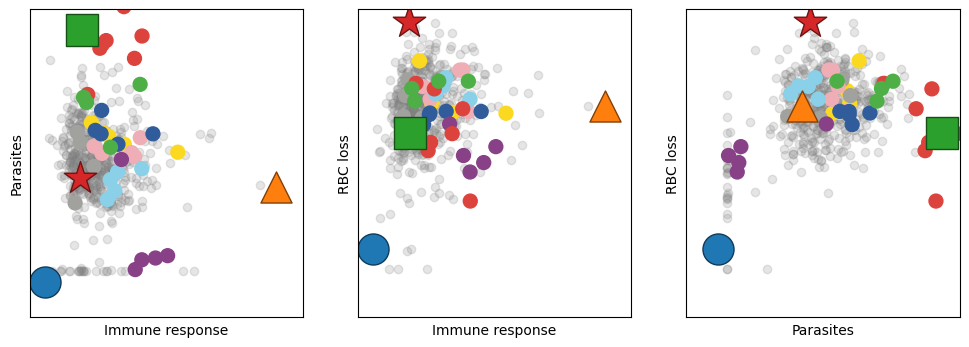

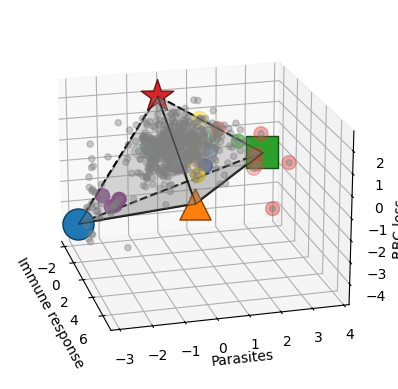

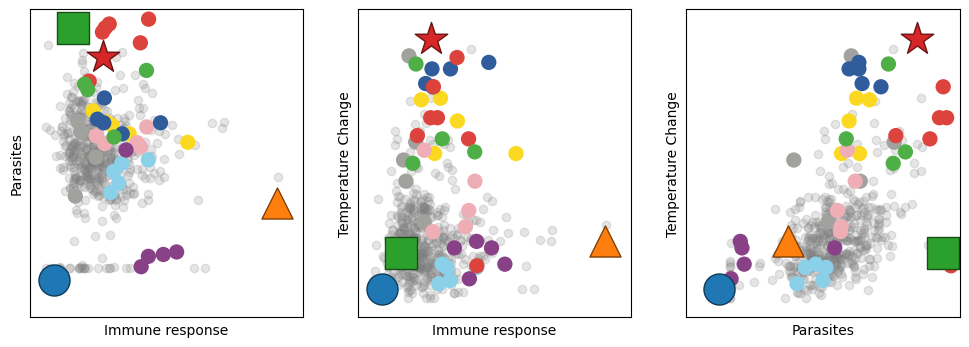

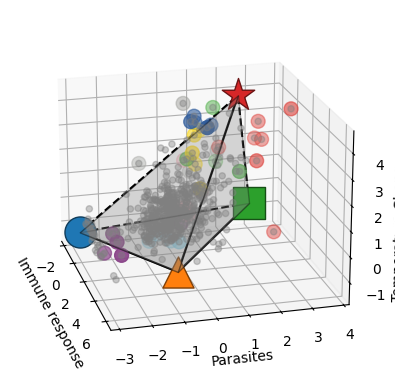

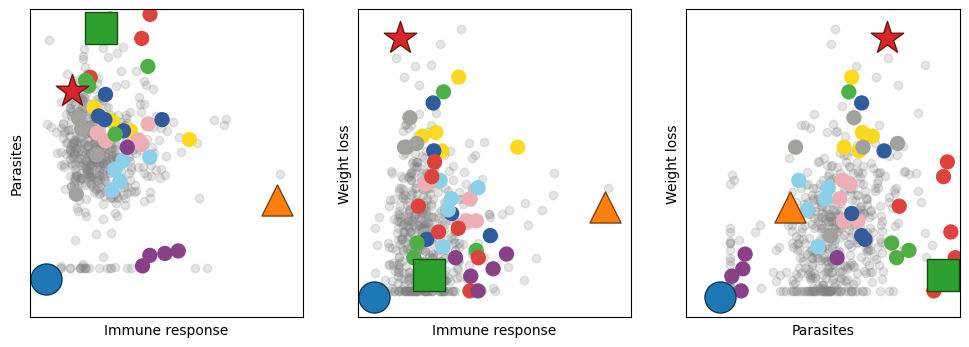

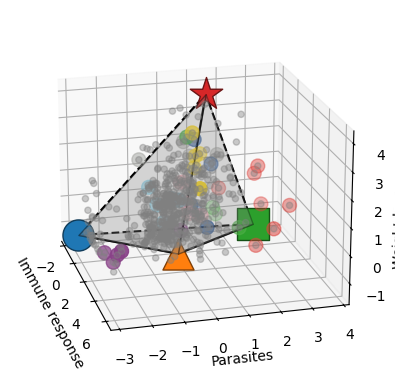

In [22]:
np.random.seed(7)
labels = ['arc 1','arc 2','arc 3','arc 4']

Ds = ['RBC','Temp','Weight']
D_labels = ['RBC loss','Temperature Change', 'Weight loss']
def sort_archetypes (arcs):
    inds = []
    arcs_remain = arcs.copy()
    arcs_ret = []
    inds.append(np.argmin(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs,inds,0)
    inds.append(np.argmax(arcs_remain[:, 2]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 0]))
    arcs_ret.append(arcs_remain[inds[-1]])
    arcs_remain = np.delete(arcs_remain,inds[-1],0)
    inds.append(np.argmax(arcs_remain[:, 1]))
    arcs_ret.append(arcs_remain[inds[-1]])
    return np.array(arcs_ret)

others = df_parents.columns[-10:]
%matplotlib inline
for D_name,D_lab in zip(Ds,D_labels):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    damage_col_name = f'Max.{D_name}.Delta.zscore'
    MDI = np.array([df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],df_maxs['Immune.Intensity.zscore']]).transpose()
    M = df_maxs['Max.Parasitemia.zscore']
    M_parents = df_parents['Max.Parasitemia.zscore']
    D = df_maxs[damage_col_name]
    D_parents = df_parents[damage_col_name]
    I = df_maxs['Immune.Intensity.zscore']
    I_parents = df_parents['Immune.Intensity.zscore']

    XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=4, delta=0.1)
    arcs = np.array(XC.transpose())
    arcs = sort_archetypes(arcs)
    arc1 = arcs[0]
    arc2 = arcs[1]
    arc3 = arcs[2]
    arc4 = arcs[3]
    axs[0].set_xlabel('Immune response')
    axs[0].set_ylabel('Parasites')
    axs[0].scatter(I, M,c='grey',alpha = 0.2,zorder = -1)
    plot_archetypes_2d(arcs,axs[0],2,0,)
    axs[0].scatter(I_parents,M_parents,c = df_parents['color'], s = 100, zorder = 0)
    axs[0].set_xlim(min(arcs[:,2].min(),I.min())*1.3,arcs[:,2].max()*1.15)
    axs[0].set_ylim(min(arcs[:,0].min(),M.min())*1.3,arcs[:,0].max()*1.15)

    axs[1].set_xlabel('Immune response')
    axs[1].set_ylabel(D_lab)
    axs[1].scatter(I, D,c = 'grey', alpha = 0.2,zorder = -1)
    plot_archetypes_2d(arcs,axs[1],2,1,)
    axs[1].scatter(I_parents,D_parents,c = df_parents['color'], s = 100, zorder = 0)
    axs[1].set_xlim(min(arcs[:,2].min(),I.min())*1.3,arcs[:,2].max()*1.15)
    axs[1].set_ylim(min(arcs[:,1].min(),D.min())*1.3,arcs[:,1].max()*1.15)

    axs[2].set_xlabel('Parasites')
    axs[2].set_ylabel(D_lab)
    axs[2].scatter(M, D,c='grey',alpha = 0.2,zorder = -1)
    plot_archetypes_2d(arcs,axs[2],0,1,)
    im = axs[2].scatter(M_parents,D_parents,c = df_parents['color'], s = 100, zorder = 0)
    axs[2].set_xlim(min(arcs[:,0].min(),M.min())*1.3,arcs[:,0].max()*1.15)
    axs[2].set_ylim(min(arcs[:,1].min(),D.min())*1.3,arcs[:,1].max()*1.15)

    for ax in axs:
        ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) 
    
    fig.savefig(f'strains_archetypes_2d_{D_lab}.png',dpi = 600, bbox_inches = 'tight')
    fig.savefig(f'strains_archetypes_2d_{D_lab}.pdf',dpi = 600, bbox_inches = 'tight')
    
    fig4 = plt.figure()
    ax4 = fig4.add_subplot(projection='3d')
    plot_archetypes_3d(arcs,ax4)
    ax4.scatter(df_maxs['Immune.Intensity.zscore'],df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],color = 'grey',alpha = 0.4,zorder = -1)

    vertices_tr1 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc3[2],arc3[0],arc3[1]]]
    vertices_tr2 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
    vertices_tr3 = [[arc3[2],arc3[0],arc3[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
    vertices_tr4 = [[arc1[2],arc1[0],arc1[1]],[arc1[2],arc1[0],arc1[1]],[arc4[2],arc4[0],arc4[1]]]
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection

    ax4.add_collection3d(Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr2], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr3], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr4], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
    ax4.plot([arc1[2],arc2[2]],[arc1[0],arc2[0]],[arc1[1],arc2[1]],color = 'black',zorder = 1)
    ax4.plot([arc2[2],arc3[2]],[arc2[0],arc3[0]],[arc2[1],arc3[1]],color = 'black',zorder = 1)
    ax4.plot([arc1[2],arc3[2]],[arc1[0],arc3[0]],[arc1[1],arc3[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc1[2],arc4[2]],[arc1[0],arc4[0]],[arc1[1],arc4[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc3[2],arc4[2]],[arc3[0],arc4[0]],[arc3[1],arc4[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc2[2],arc4[2]],[arc2[0],arc4[0]],[arc2[1],arc4[1]],color = 'black',zorder = 1)
    ax4.set_ylabel('Parasites')
    ax4.set_zlabel(D_lab)
    ax4.set_xlabel('Immune response',rotation = 90)
    ax4.xaxis.labelpad = 0
    ax4.yaxis.labelpad = 0
    ax4.zaxis.labelpad = 0
    ax4.scatter(I_parents,M_parents,D_parents,c = df_parents['color'], s = 100, zorder = -2)

    #ax4.tick_params(axis = 'both',bottom = False, right =False, labelleft = False, labelbottom = False)
    ax4.view_init(elev=20., azim=-15, roll=0)
    fig4.savefig(f'strains_archetypes_3d_{D_lab}.png',dpi = 600, bbox_inches = 'tight')
    fig4.savefig(f'strains_archetypes_3d_{D_lab}.pdf',dpi = 600, bbox_inches = 'tight')


    plt.show()